# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

https://github.com/eredmiles/Fraud-Corruption-Detection-Data-Science-Pipeline-DSSG2015/blob/master/WorldBank2015/Code/modeling/model_pipeline_script.py

# Audit Risk Analysis
The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors.

- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## Step 1: Importing data and basic machine learning libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#risk in audit_risk should be used for classification
trial = pd.read_csv('trial.csv')
audit_risk = pd.read_csv('audit_risk.csv')


### Step 1.2 Adjust Column Scaling

In [2]:
trial['SCORE_A'] = trial['SCORE_A'] / 10
trial['SCORE_B'] = trial['SCORE_B'] / 10

In [3]:
audit_risk.drop_duplicates(keep='first', inplace=True)
trial.drop_duplicates(keep='first', inplace=True)

In [4]:
trial = trial.drop(["Risk"],axis=1)

In [5]:
trial.head(3)

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score
0,3.89,23,4.18,0.6,2.50,0.2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4
1,3.89,6,0.00,0.2,4.83,0.2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0
2,3.89,6,0.51,0.2,0.23,0.2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0


### Step 1.3 Merge two datasets

In [6]:
result = pd.merge(audit_risk, trial, how='outer', 
                       left_on=['Sector_score','LOCATION_ID','PARA_A','Score_A','PARA_B','Score_B','TOTAL','numbers','Money_Value','District_Loss','History','Score'],
                      right_on=['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Money_Value','District','History','Score'])

result.head(2)


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,0.6,0.2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,0.2,0.2,2,2,2,0,2,2


### Step 1.4: Impute Missing Values and Drop Redundant Columns

In [7]:
#Check if dataset contains any nulls
result.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
dtype: bool

##### Filling in missing values

In [8]:
result['Money_Value'].dtype
result['Money_Value'].fillna((result['Money_Value'].mean()),inplace=True)

##### drop columns

In [9]:

#We do not need the Location_ID as value for analysis

result = result.drop(["LOCATION_ID","Score_A","SCORE_B"],axis=1)


result.shape

(763, 32)

In [10]:
result.head(3)

,Sector_score,PARA_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,...,Detection_Risk,Audit_Risk,Risk,SCORE_A,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,4.18,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,...,0.5,1.7148,1,0.6,2,2,2,0,2,2
1,3.89,0.00,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,...,0.5,0.5108,0,0.2,2,2,2,0,2,2
2,3.89,0.51,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,...,0.5,0.3096,0,0.2,2,2,2,0,2,2


In [11]:
#Check if dataset contains any nulls
result.isnull().any()

Sector_score      False
PARA_A            False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value       False
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
dtype: bool

## Step 2: Data Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [13]:
def bar_chart(feature):
    survived = result[result['Risk']==1][feature].value_counts()
    dead = result[result['Risk']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['non risk','risk']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

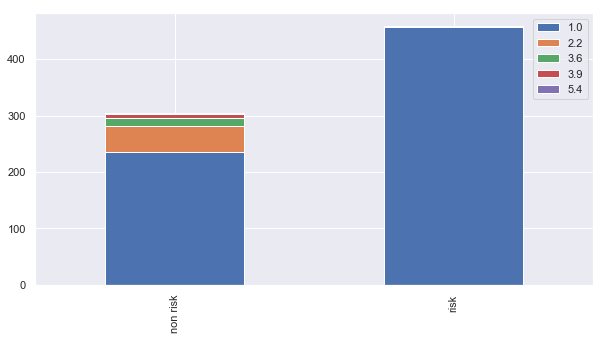

In [14]:
bar_chart('Risk_C')

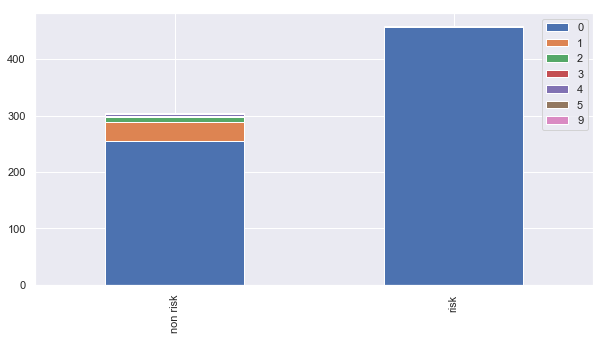

In [15]:
bar_chart('History')

Histograms are commonly used to visualize numerical variables. 
Histograms group data into bins and provide you a count of the number of observations in each bin. 

1. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. 

2. It can also help you see possible outliers.

C:\Users\jiten\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


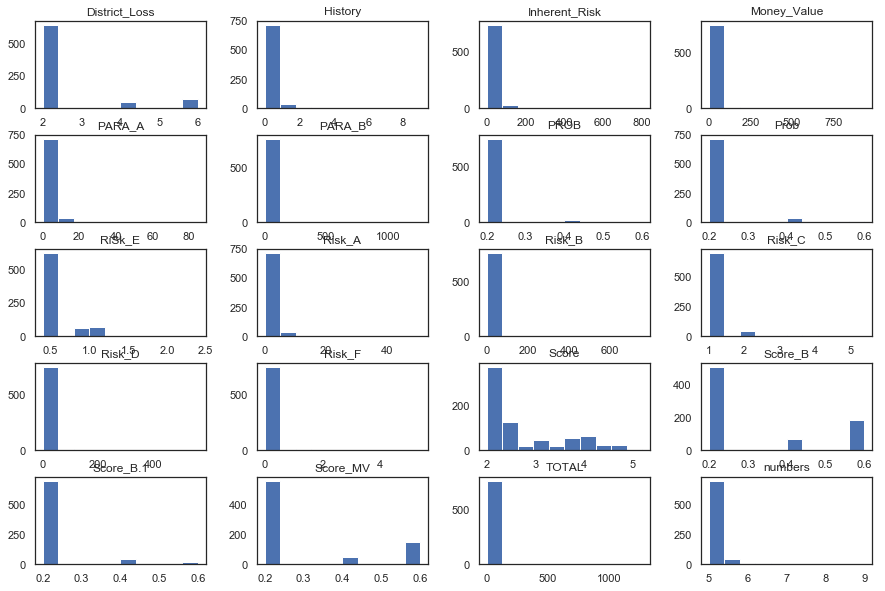

In [16]:
#lets get the frequency of risk
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
#For a merge + slice
data_mean=result.ix[:,1:21]
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

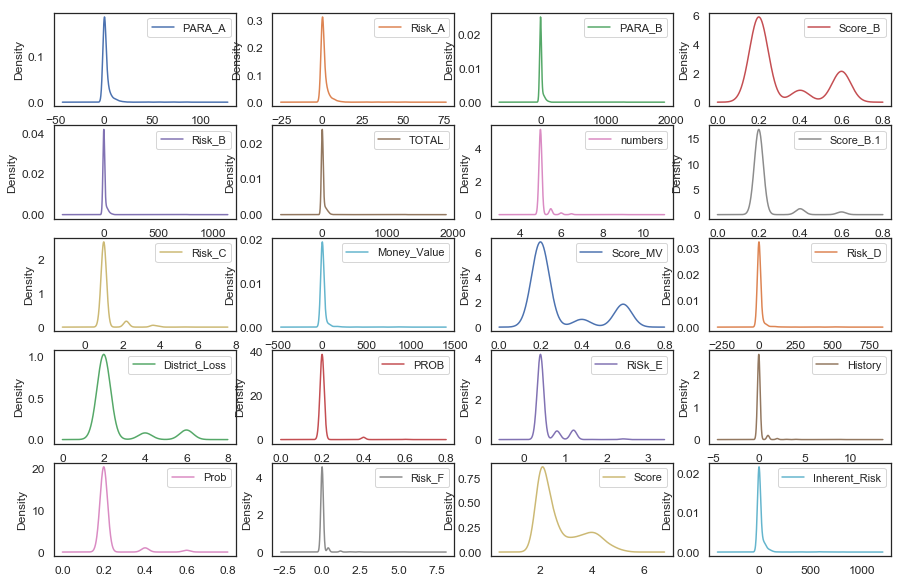

In [17]:
#Visualize distribution of data via density plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(5,4), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


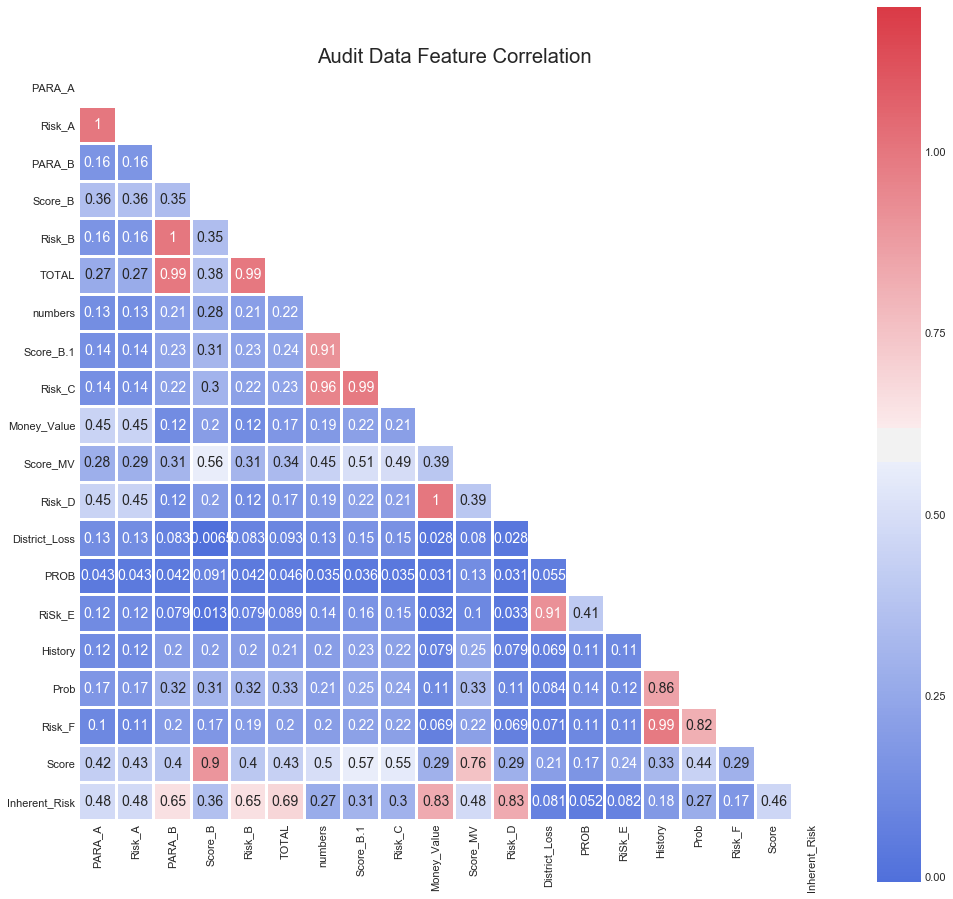

In [18]:
# plot correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
sns.set_style("white")

corr = data_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
results, ax = plt.subplots(figsize=(15, 15))
plt.title('Audit Data Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

Observation:
1. There are multiple highly colrrelated features such as Money Value and Risk_D, PARA_B and Risk_B.
2. Some paramters are moderately positive correlated (r between 0.5-0.75)
Feature selection:
1. Keeping only 1 of the columns where correlation score is more than .99.
 

In [19]:

result.drop(['Detection_Risk', 'PARA_A', 'PARA_B', 'Score_B.1', 'Money_Value', 
                           'Score_MV'],axis=1, inplace = True)

# Regression Task

Model Selection:
1. KNN regressor
2. linear regression
3. Ridge, Lasso, polynomial regression
4. SVM linear
5. SVM with kernels.


### Feature Standardization

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

As seen, the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

Therefore, I have chosen to use the Min Max Scaler to scale and transform the data. In this we subtract the Minimum from all values – thereby marking a scale from Min to Max. Then divide it by the difference between Min and Max. The result is that our values will go from zero to 1.

From our data visualization, we see: 

The distribution of the features and target column isn’t Gaussian.
The feature falls within a large interval.

Therefore, min max scaling will best here.

## Step 3. Scaling and Model Selection 

In [20]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

#### choose target values

In [21]:
#drop 
regression_target = result['Audit_Risk']

classification_target = result['Risk']

result.drop(['Audit_Risk','Risk'],axis=1, inplace = True)


In [22]:
result.columns

Index(['Sector_score', 'Risk_A', 'Score_B', 'Risk_B', 'TOTAL', 'numbers',
       'Risk_C', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'SCORE_A',
       'Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE',
       'History_score'],
      dtype='object')

In [23]:
#scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(result, regression_target, test_size=0.25, random_state=10)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

# Success
print ("Training and testing split was successful.")


Training and testing split was successful.


## KNN Regressor

Text(0,0.5,'MSE')

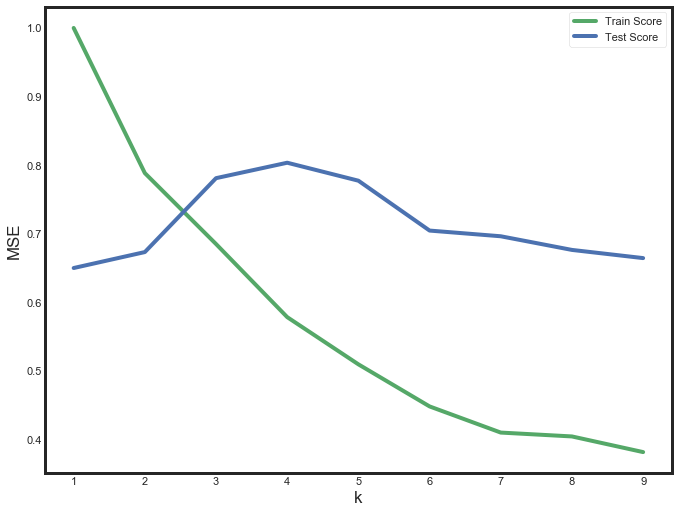

In [24]:
#Finding the best K
from sklearn.neighbors import KNeighborsRegressor 

train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [25]:
knn_reg = KNeighborsRegressor(2)
knn_reg.fit(X_train, y_train)
print(knn_reg.score(X_train, y_train))
print(knn_reg.score(X_test, y_test))

0.788233990935
0.67306096614


### Using Grid Search To Find the Best Parameter for KNeighbors Regression


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor 


parameters = [{'weights': ['uniform','distance'], 'n_neighbors': [1,2,3,5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]
clf = GridSearchCV(KNeighborsRegressor(), parameters,cv=20,)
clf.fit(X_train, y_train)

print("Best parameters: {}".format(clf.best_params_))
print("Best cross-validation score: {:.2f}".format(clf.best_score_))

print("train score for Best parameters: ", clf.score(X_train,y_train))
print("test score for Best parameters: ", clf.score(X_test,y_test))



Best parameters: {'n_neighbors': 20, 'weights': 'distance'}
Best cross-validation score: 0.57
train score for Best parameters:  1.0
test score for Best parameters:  0.699091495476


## Linear regression

In [27]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.940110924867
0.338871958117


#### cross validation

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=15, shuffle=True, random_state=0)

scores = cross_val_score(lreg, result, regression_target)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation score mean:  ", scores.mean())

Cross-validation scores: [ 0.58859748  0.09086822 -2.60215511]
Cross-validation score mean:   -0.640896469277


## Ridge Regression

In [29]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[0.93389252662012401, 0.9291507470489675, 0.88112500917940895, 0.53703110264550635, 0.22605898069952557]
[0.35146750696071916, 0.49080399815561637, 0.53385927264534572, 0.48765215559201586, 0.50744760441033987]


Text(0.5,0,'$\\alpha$')

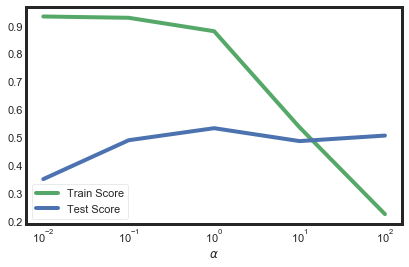

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Using Grid Search To Find the Best Parameter for Ridge Regression

In [31]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge(alpha)
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000] }
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

print("train score for Best parameters: ", grid_search.score(X_train,y_train))
print("test score for Best parameters: ", grid_search.score(X_test,y_test))


Best parameters: {'alpha': 1}
Best cross-validation score: 0.45
train score for Best parameters:  0.881125009179
test score for Best parameters:  0.533859272645


## Lasso Regression 

In [32]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[0.92967620339273782, 0.92132691912830011, 0.63145577362373184, 0.0, 0.0]
[0.45668821807599269, 0.54573142237115402, 0.77381943985446833, -0.0095921465412236451, -0.0095921465412236451]


Text(0.5,0,'$\\alpha$')

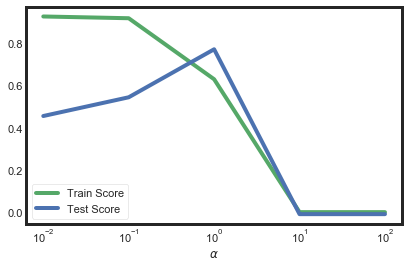

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

C:\Users\jiten\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


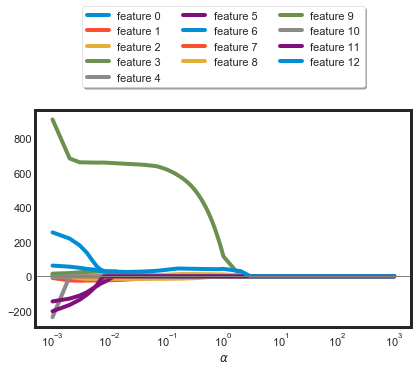

In [34]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000, 1000000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000, 1000000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Using Grid Search To Find the Best Parameter for Lasso Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
lasso = Lasso(alpha)
param_grid = {'alpha':[ 0.01, 0.1, 1, 10, 100, 1000, 10000] }
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


print("train score for Best parameter: ", grid_search.score(X_train,y_train))
print("test score for Best parameters: ", grid_search.score(X_test,y_test))


Best parameters: {'alpha': 1}
Best cross-validation score: 0.56
train score for Best parameter:  0.631455773624
test score for Best parameters:  0.773819439854


## Polynomial regression

In [36]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,5):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.94011092486704928, 1.0, 1.0, 1.0]
[0.33887195811675452, 0.66388966635722224, -0.44340963748945028, -0.10511439538254641]


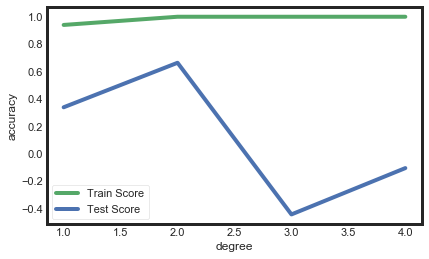

In [37]:
%matplotlib inline

x_axis = range(1,5)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [38]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

train_score = lreg.score(X_train_poly, y_train)
test_score = lreg.score(X_test_poly, y_test)
print (('\nThe classifier train score is {:03.2f}').format(train_score))
print (('The classifier test score is {:03.2f}').format(test_score))



The classifier train score is 1.00
The classifier test score is 0.66


## SVR Linear

In [39]:
#Fitting Kernel SVM to the Training Set
from sklearn.svm import SVR
clf = SVR(kernel = 'linear')
clf.fit(X_train, y_train)

 
classifier_score = clf.score(X_test, y_test)
print (('\nThe classifier accuracy score is {:03.2f}\n').format(classifier_score))


The classifier accuracy score is 0.47



In [40]:
scores = cross_val_score(clf, result, regression_target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.3583043   0.57034669  0.49766787]


### Using Grid Search To Find the Best Parameter for Linear SVR

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]

grid_search = GridSearchCV(estimator = SVR(),
              param_grid = parameters,
              scoring='neg_mean_squared_error', verbose=0, n_jobs=-1,
              cv = 5, )

grid_search = grid_search.fit(X_train, y_train)


In [42]:
print("The best parameters are %s with a MSE of %0.4f"
      % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'C': 100, 'kernel': 'linear'} with a MSE of -1185.6744


#### fitting model with the best parameter from grid search

In [43]:
clf = SVR(kernel = 'linear', C = 100)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)

classifier_score = clf.score(X_test, y_test)
print (('\nThe classifier train score is {:03.2f}.').format(train_score))
print (('The classifier test score is {:03.2f}.\n').format(classifier_score))


The classifier train score is 0.42.
The classifier test score is 0.38.



## Using Grid Search To Find the Best Parameter for Kernelized SVR

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.001,0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)


grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)


In [45]:
print("The best parameters are %s with a score of %0.4f"
      % (grid_result.best_params_, grid_result.best_score_))

The best parameters are {'C': 1000, 'epsilon': 1, 'gamma': 0.1} with a score of -1020.5946


#### fitting model with the best parameter from grid search

In [46]:
clf = SVR(kernel = 'rbf', C = 1000)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)

classifier_score = clf.score(X_test, y_test)
print (('\nThe classifier train score is {:03.2f}.').format(train_score))
print (('The classifier test score is {:03.2f}.\n').format(classifier_score))



The classifier train score is 0.61.
The classifier test score is 0.95.



# Test Set Evaluation of the Best Model

According to the grid search scores, the Polynomial Regression with a degree of 3 is the best-performing model for classification, so now let's evaluate its performance on the test set.

In [47]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

train_score = lreg.score(X_train_poly, y_train)
test_score = lreg.score(X_test_poly, y_test)
print (('\nThe classifier train score is {:03.2f}').format(train_score))
print (('The classifier test score is {:03.2f}').format(test_score))



The classifier train score is 1.00
The classifier test score is 0.66


# Classification task:

1. KNN classifcation
2. Logistic Regression
3. Linear Supprt Vector Machine
4. Kerenilzed Support Vector Machine 
5. Decision Tree

### Feature Standardization

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

As seen, the raw data has differing distributions which may have an impact on the most ML algorithms. Most machine learning and optimization algorithms behave much better if features are on the same scale.

Therefore, I have chosen to use the Standard Scaler to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

X_train, X_test, y_train, y_test = train_test_split(result, classification_target, test_size=0.25, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

# Success
print ("Training and testing split was successful.")


Training and testing split was successful.


## KNN Classification

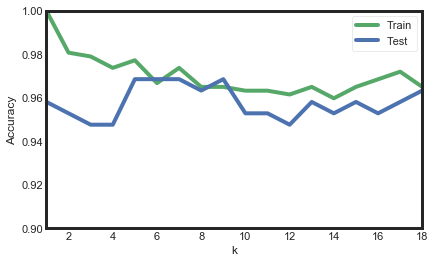

In [49]:
import numpy as np
import matplotlib.pyplot as plt

train_array = []
test_array = []
x_axis = range(1,20)

for k in range(1,20):
    knn=KNeighborsClassifier(k)   
    knn.fit(X_train,y_train)
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    train_array.append(train_score)
    test_array.append(test_score)

line1, = plt.plot(x_axis, train_array, c='g', label = 'Train')
line2, = plt.plot(x_axis, test_array, c='b', label = 'Test')
plt.axis([1,18,0.9,1])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(handles = [line1, line2],loc = 1)
plt.show()

In [50]:
knn=KNeighborsClassifier(3)   
knn.fit(X_train,y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)

print('Train score=',train_score,'Test score=',test_score)

Train score= 0.979020979021 Test score= 0.947643979058


### Using Grid Search to find Best Parameter for KNN

In [51]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': [3,5,11,19],
              'weights': ['uniform', 'distance'],
               'metric': ['euclidean','manhattan']}
gs = GridSearchCV(
      KNeighborsClassifier(),
      grid_params,
      verbose = 1,
      cv= 3,
      n_jobs = -1)

gs_results = gs.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    6.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    6.7s finished


In [52]:
gs_results.best_score_

0.97552447552447552

In [53]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}

## Logistic Regression

### Using List to find Best Parameter for Logistic Regression

In [54]:
#appending scores to list
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

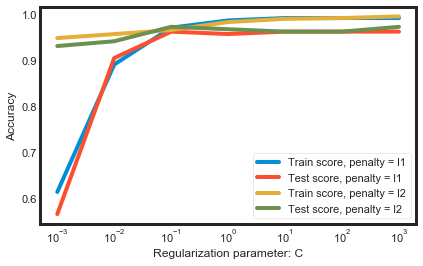

In [55]:
#visualizing scores
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### Using Grid Search to find Best Parameter for Logistic Regression

In [56]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Best Penalty: l2
Best C: 10000.0


In [57]:
print("accuracy :",best_model.best_score_)

accuracy : 0.987762237762


#### Accuracy using Grid Search

In [58]:
print("score:",best_model.score(X_test,y_test))

score: 0.984293193717


In [59]:
# Predict target vector
best_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0], dtype=int64)

## Linear Support Vector Machine

In [60]:
#Fitting Kernel SVM to the Training Set
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 30% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print (('\nThe classifier accuracy score is {:03.2f}\n').format(classifier_score))


The classifier accuracy score is 0.97



In [61]:
scores = cross_val_score(clf, result, classification_target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.99212598  0.92519685]


#### confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report

# The confusion matrix helps visualize the performance of the algorithm.
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)

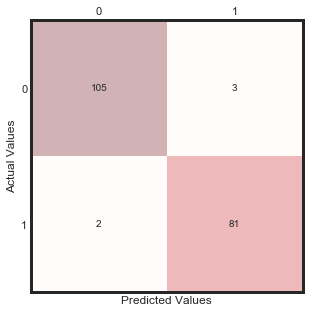

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       108
          1       0.96      0.98      0.97        83

avg / total       0.97      0.97      0.97       191



In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

train = []
test = []

for d in [1, 2, 3, 5, 7]:
    #create the model
    dtree = DecisionTreeClassifier(max_depth= d)
    
    #train the model
    dtree.fit(X_train, y_train)
    
    #evaluate the model
    train.append(dtree.score(X_train, y_train))
    test.append(dtree.score(X_test, y_test))

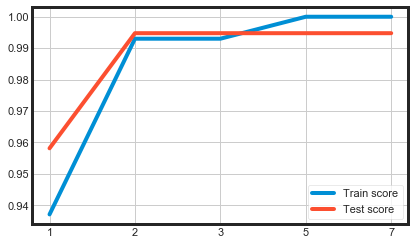

In [65]:
%matplotlib inline

plt.plot(range(5), train, label = 'Train score')
plt.plot(range(5), test, label = 'Test score')
plt.legend()
plt.xticks(range(5), [1, 2, 3, 5, 7])
plt.grid()

In [66]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


#### varying the depth

In [67]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


### Using Grid Search to find best parameters for Decision Trees

In [68]:
from sklearn.model_selection import GridSearchCV
parameters = {'min_samples_split':np.arange(2, 80), 'max_depth': np.arange(2,10), 'criterion':['gini', 'entropy']}
clfr = DecisionTreeClassifier()
grid = GridSearchCV(clfr, parameters,scoring='accuracy', cv=8)
grid.fit(X_train,y_train)


GridSearchCV(cv=8, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([ 2,  3, ..., 78, 79]), 'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [69]:
print('The best parameters: ', grid.best_params_)

The best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 8}


In [70]:
print('The best accuracy achieved after parameter tuning: ', grid.best_score_)

The best accuracy achieved after parameter tuning:  0.998251748252


## Kernerlized SVC Using Grid Search 

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(estimator = clf,
              param_grid = parameters,
              scoring = 'accuracy',
              cv = 10)

grid_search = grid_search.fit(X_train, y_train)

In [72]:
accuracy = grid_search.best_score_
accuracy

0.98776223776223782

In [73]:
print("The best parameters are %s with a score of %0.4f"
      % (grid_search.best_params_, grid_search.best_score_))

The best parameters are {'C': 100, 'kernel': 'linear'} with a score of 0.9878


# Test Set Evaluation of the Best Model

We are chosing the best model on the basis of accuracy score of grid search.
According to the grid search scores, the Decision Tree is the best-performing model for classification, so now let's evaluate its performance on the test set.

In [74]:

from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [75]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('Average Precision score', average_precision_score(y_test, y_score)))
        print(format_str % ('ROC AUC Score', roc_auc_score(y_test, y_score)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))


In [76]:
classification_eval(grid, X_test, y_test)

CONFUSION MATRIX
[[108   0]
 [  1  82]] 

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0      0.991     1.000     0.995       108
          1      1.000     0.988     0.994        83

avg / total      0.995     0.995     0.995       191

SCALAR METRICS
Average Precision score = 0.993
ROC AUC Score = 0.994
     Accuracy = 0.995
